In [1]:
L = 'B'  # First letter of my name
N = ord(L) % 5 + 1
N

2

In [4]:
import pandas as pd

# Load the US Baby Names dataset
df = pd.read_csv("NationalNames.csv")

#Ex.3
# Get the column names of the dataset
columns = df.columns
print(columns)


Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [3]:
#Ex.4
# Get general information (summary statistics) about the data
general_info = df.describe()
print(general_info)


                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


In [17]:
#Ex.5
# Count the number of unique names
unique_names_count = df['Name'].nunique()
print(unique_names_count)


93889


In [6]:
#Ex.8
# Find the row with the maximum count in the dataset
most_popular_name_row = df.loc[df['Count'].idxmax()]

# Get the name and year for which the count is maximum
most_popular_name = most_popular_name_row['Name']
most_popular_year = most_popular_name_row['Year']

print(f"The most popular name is '{most_popular_name}' in {most_popular_year}.")



The most popular name is 'Linda' in 1947.


In [23]:
#Ex.9
# Find the number of records with the minimum count
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]
print(min_count_records)


254615


In [6]:
#Ex.11
# Group the data by 'Year' and count unique names for each year
unique_names_per_year = df.groupby('Year')['Name'].nunique()

# Find the year with the most unique names
year_most_unique_names = unique_names_per_year.idxmax()
most_unique_names_count = unique_names_per_year.max()

result = pd.DataFrame({'Year': [year_most_unique_names], 'Name': [most_unique_names_count]})
result.set_index('Year', inplace=True)

print(result)


       Name
Year       
2008  32488


In [18]:
#Ex.12
# Filter the dataset for 2008 and find the most popular name
df_2008 = df[df['Year'] == most_unique_names_year]
most_popular_name_2008 = df_2008[df_2008['Count'] == df_2008['Count'].max()]['Name'].values[0]
print(most_popular_name_2008)


Jacob


In [16]:
#Ex.13
# Find the year when 'Jacob' was most popular as a female name
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
most_popular_jacob_female_year = jacob_female[jacob_female['Count'] == jacob_female['Count'].max()]
print(most_popular_jacob_female_year)


              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


In [24]:
#Ex.14
# Filter the dataset to find gender-neutral names (names that appear for both male and female)
gender_neutral_names = df.groupby('Name').filter(lambda x: len(x['Gender'].unique()) == 2)

# Group by 'Year' and count the number of unique gender-neutral names per year
gender_neutral_counts_per_year = gender_neutral_names.groupby('Year')['Name'].nunique()

# Find the year with the most gender-neutral names
year_most_gender_neutral = gender_neutral_counts_per_year.idxmax()
most_gender_neutral_count = gender_neutral_counts_per_year.max()

result = pd.DataFrame({'Year': [year_most_gender_neutral], 'Gender_neutral_names': [most_gender_neutral_count]})
result.set_index('Year', inplace=True)

print(result)


      Gender_neutral_names
Year                      
2009                  7372


In [28]:
#Ex.16
# Find the year with the greatest number of births
year_greatest_births = total_births_per_year.idxmax()
print(year_greatest_births)

1957


In [29]:
#Ex.17
# Count births by gender per year
births_by_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
print(births_by_gender.head())


Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


In [30]:
#Ex.18
# Count the number of years with more girls born than boys
years_more_girls = (births_by_gender['F'] > births_by_gender['M']).sum()
print(years_more_girls)


54


In [36]:
!pip install pandas numpy matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)


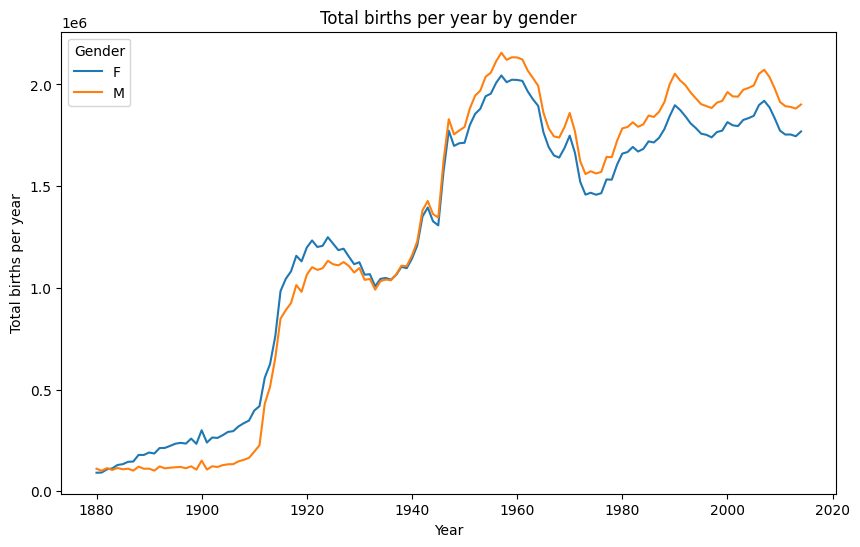

In [37]:
#Ex.19
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Year' and 'Gender', and sum the 'Count' column to get the total number of births per gender per year
total_births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Plot the total births per year for each gender
total_births_per_year_gender.plot(kind='line', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Total births per year')
plt.title('Total births per year by gender')

# Show legend and plot
plt.legend(title='Gender')
plt.show()


In [32]:
#Ex.20
# Count the number of gender-neutral names
gender_neutral_name_counts = df.groupby('Name').filter(lambda x: len(x['Gender'].unique()) == 2)
unique_gender_neutral_names_count = gender_neutral_name_counts['Name'].nunique()
print(unique_gender_neutral_names_count)


10221


In [39]:
#Ex.22
# Calculate the number of unique years in the dataset
number_of_years = df['Year'].nunique()
print(f'The observation was carried out for {number_of_years} years.')


The observation was carried out for 135 years.


In [41]:
#Ex.23
# First, group by 'Name' and 'Year' and check if the name appears for both 'F' and 'M'
gender_neutral_names = df.groupby(['Name', 'Year'])['Gender'].nunique().unstack()

# Filter names that appear for both genders in all years
popular_gender_neutral_names = gender_neutral_names[gender_neutral_names == 2].dropna(how='any').index

# Display the list of most popular gender-neutral names
popular_gender_neutral_names_list = list(popular_gender_neutral_names)

popular_names_df = pd.DataFrame(popular_gender_neutral_names_list, columns=[0])

print(popular_names_df)


          0
0   Francis
1     James
2      Jean
3     Jesse
4    Jessie
5      John
6   Johnnie
7    Joseph
8       Lee
9    Leslie
10   Marion
11    Ollie
12   Robert
13   Sidney
14   Tommie
15  William


In [5]:
#Ex.24
# Find names that were given a small number of times (e.g., minimum number of times)
max_count = df['Count'].max()

# Filter the dataset to get the names that have the minimum count
unpopular_names = df[df['Count'] == max_count]

# Now, find the name that has the maximum count among these "unpopular" names
most_popular_unpopular_name = unpopular_names.loc[unpopular_names['Count'].idxmax()]

print(f"{most_popular_unpopular_name['Name']} is the most popular unpopular name. This name was given to babies {most_popular_unpopular_name['Count']} times.")


Linda is the most popular unpopular name. This name was given to babies 99680 times.


In [59]:
#Ex.27
# Group by 'Year', find the name with the maximum count for each year
most_popular_names_each_year = df.loc[df.groupby('Year')['Count'].idxmax(), ['Year', 'Name', 'Count']]

# Set the 'Year' as the index for easier readability (optional)
most_popular_names_each_year.set_index('Year', inplace=True)

print(most_popular_names_each_year)


          Name  Count
Year                 
1880      John   9655
1881      John   8769
1882      John   9557
1883      John   8894
1884      John   9388
...        ...    ...
2010  Isabella  22883
2011    Sophia  21816
2012    Sophia  22267
2013    Sophia  21147
2014      Emma  20799

[135 rows x 2 columns]
